In [101]:
import pandas as pd
from pandas import json_normalize
import json
# data = pd.read_csv('../train.csv')
# data.head()
JSON_COLUMNS = ['device', 'geoNetwork', 'totals', 'trafficSource']
    
df = pd.read_csv('../train.csv', 
                 converters={column: json.loads for column in JSON_COLUMNS}, 
                 dtype={'fullVisitorId': 'str'}) # Important!!               
for column in JSON_COLUMNS:
    column_as_df = json_normalize(df[column])
    column_as_df.columns = [f"{column}.{subcolumn}" for subcolumn in column_as_df.columns]
    df = df.drop(column, axis=1).merge(column_as_df, right_index=True, left_index=True)
df.head()
#data = df.sample(frac = 0.1) 
data = df
print(data)

       channelGrouping      date        fullVisitorId  \
0       Organic Search  20160902  1131660440785968503   
1       Organic Search  20160902   377306020877927890   
2       Organic Search  20160902  3895546263509774583   
3       Organic Search  20160902  4763447161404445595   
4       Organic Search  20160902    27294437909732085   
...                ...       ...                  ...   
903648          Social  20170104  5123779100307500332   
903649          Social  20170104  7231728964973959842   
903650          Social  20170104  5744576632396406899   
903651          Social  20170104  2709355455991750775   
903652          Social  20170104  0814900163617805053   

                             sessionId  socialEngagementType     visitId  \
0       1131660440785968503_1472830385  Not Socially Engaged  1472830385   
1        377306020877927890_1472880147  Not Socially Engaged  1472880147   
2       3895546263509774583_1472865386  Not Socially Engaged  1472865386   
3       476

In [4]:
data.reset_index()

,index,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,...,trafficSource.adwordsClickInfo.criteriaParameters,trafficSource.isTrueDirect,trafficSource.referralPath,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adContent,trafficSource.campaignCode
0,783613,Social,20161120,1568301603642916824,1568301603642916824_1479713603,Not Socially Engaged,1479713603,1,1479713603,Safari,...,not available in demo dataset,NaN,/yt/about/,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,392937,Social,20160830,0292504906268699925,0292504906268699925_1472589522,Not Socially Engaged,1472589522,1,1472589522,Safari,...,not available in demo dataset,NaN,/yt/about/el/,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,181795,Direct,20160819,5387945124915566972,5387945124915566972_1471647197,Not Socially Engaged,1471647197,1,1471647197,Chrome,...,not available in demo dataset,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25254,Social,20161110,2515062108137549346,2515062108137549346_1478837255,Not Socially Engaged,1478837255,1,1478837255,Safari,...,not available in demo dataset,NaN,/yt/about/,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,506087,Social,20160905,114718564229295748,114718564229295748_1473088399,Not Socially Engaged,1473088399,1,1473088399,Chrome,...,not available in demo dataset,NaN,/yt/about/en-GB/,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90360,183355,Organic Search,20161128,9120824385701823315,9120824385701823315_1480330691,Not Socially Engaged,1480330691,5,1480330691,Firefox,...,not available in demo dataset,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90361,435689,Organic Search,20161115,2737613548292111272,2737613548292111272_1479209514,Not Socially Engaged,1479209514,1,1479209514,Safari,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90362,447209,Organic Search,20170504,7956105392971176472,7956105392971176472_1493951123,Not Socially Engaged,1493951123,1,1493951123,Chrome,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90363,193750,Social,20161122,0598400658942335997,0598400658942335997_1479875623,Not Socially Engaged,1479875623,1,1479875623,Safari,...,not available in demo dataset,NaN,/yt/about/,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.dtypes

channelGrouping                                      object
date                                                  int64
fullVisitorId                                        object
sessionId                                            object
socialEngagementType                                 object
visitId                                               int64
visitNumber                                           int64
visitStartTime                                        int64
device.browser                                       object
device.browserVersion                                object
device.browserSize                                   object
device.operatingSystem                               object
device.operatingSystemVersion                        object
device.isMobile                                        bool
device.mobileDeviceBranding                          object
device.mobileDeviceModel                             object
device.mobileInputSelector              

In [103]:
#Подобранные признаки
df = data[['channelGrouping', 'date', 'fullVisitorId', 'visitStartTime',
           'socialEngagementType', 'visitNumber', 'device.browser','device.isMobile',
           'device.operatingSystem', 'geoNetwork.country',
           'totals.visits', 'totals.transactionRevenue', 'totals.hits', 'totals.pageviews']].copy()

In [104]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
#Месяц в котором посетили магазин
df['month'] = df.apply(lambda row: row.date.month, axis = 1)
df['weekday'] = df.apply(lambda row: row.date.weekday(), axis = 1)
df['quarter'] = df.apply(lambda row: row.date.quarter, axis = 1)
#df['']
df['visitStartTime'] = pd.to_datetime(df['visitStartTime'], unit='s')
df['visit_hour'] = df['visitStartTime'].apply(lambda row: row.hour)

In [105]:
import numpy as np
print(df.shape)
df = df.dropna()
print(df.shape)


(903653, 18)
(11515, 18)


In [106]:
df = df.rename(columns={"totals.transactionRevenue": "transactionRevenue"})
print(df.transactionRevenue)
df['transactionRevenue'] = df['transactionRevenue'].astype(float)

752        37860000
753       306670000
799        68030000
802        26250000
859       574150000
            ...    
903302    335260000
903305    599950000
903314     30750000
903315     69390000
903317     74990000
Name: transactionRevenue, Length: 11515, dtype: object


In [107]:
y = np.log1p(df['transactionRevenue'])

In [108]:

normalized_data = df.drop(columns=['transactionRevenue', 'fullVisitorId', 'date', 'visitStartTime'])
print(normalized_data)
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
normalized_data['channelGrouping'] = encoder.fit_transform(normalized_data['channelGrouping'])
normalized_data['socialEngagementType'] = encoder.fit_transform(normalized_data['socialEngagementType'])
normalized_data['device.browser'] = encoder.fit_transform(normalized_data['device.browser'])
normalized_data['device.isMobile'] = encoder.fit_transform(normalized_data['device.isMobile'])
normalized_data['device.operatingSystem'] = encoder.fit_transform(normalized_data['device.operatingSystem'])
normalized_data['geoNetwork.country'] = encoder.fit_transform(normalized_data['geoNetwork.country'])
print(normalized_data)

       channelGrouping  socialEngagementType  visitNumber device.browser  \
752             Direct  Not Socially Engaged            1         Chrome   
753     Organic Search  Not Socially Engaged            3         Chrome   
799           Referral  Not Socially Engaged            7         Chrome   
802           Referral  Not Socially Engaged            6         Chrome   
859           Referral  Not Socially Engaged            4         Chrome   
...                ...                   ...          ...            ...   
903302        Referral  Not Socially Engaged           10         Chrome   
903305        Referral  Not Socially Engaged            2         Chrome   
903314        Referral  Not Socially Engaged            1         Chrome   
903315          Direct  Not Socially Engaged            3        Firefox   
903317          Direct  Not Socially Engaged           12         Chrome   

        device.isMobile device.operatingSystem geoNetwork.country  \
752               

In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(normalized_data, y, test_size=0.2)
from sklearn.linear_model import LinearRegression
logreg = LinearRegression()
logreg.fit(X_train, y_train)
logreg.predict(X_test)
score = logreg.score(X_test, y_test)
print(score)

0.14830301535883483


In [126]:
from sklearn.svm import SVR
svc = SVR(C=500)
svc.fit(X_train, y_train)
svc.predict(X_test)
print(svc.score(X_test, y_test))

0.18363140989172144


In [186]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state =45, n_estimators=250, max_features=3, max_depth=15)
rfr.fit(X_train, y_train)
rfr.predict(X_test)
print(rfr.score(X_test, y_test))

0.22990947229429082


In [195]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state =45, max_depth=3, learning_rate=0.3, n_estimators=150)
gbr.fit(X_train, y_train)
gbr.predict(X_test)
print(gbr.score(X_test, y_test))

0.2520497779498797


In [201]:
from sklearn.model_selection import cross_val_score
scores1 = cross_val_score(logreg, X_test, y_test, cv=5)
print(scores1.mean())

0.13878980382488257


In [202]:
scores2 = cross_val_score(svc, X_test, y_test, cv=5)
print(scores2.mean())

0.15944579271938597


In [203]:
scores3 = cross_val_score(rfr, X_test, y_test, cv=5)
print(scores3.mean())

0.19286119335691518


In [204]:
scores4 = cross_val_score(gbr, X_test, y_test, cv=5)
print(scores4.mean())

0.1459792055524704


Text(0, 0.5, 'Качество модели')

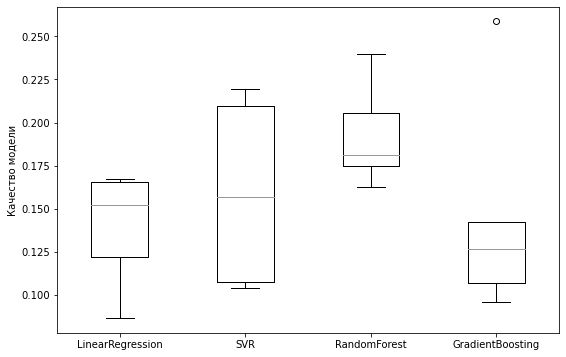

In [217]:
import matplotlib.pyplot as plt
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
data_to_plot = [scores1,scores2,scores3,scores4]
bp = ax.boxplot(data_to_plot, labels = ['LinearRegression','SVR','RandomForest','GradientBoosting'])
ax.set_ylabel('Качество модели')

In [218]:
scores1 = cross_val_score(logreg, X_test, y_test, cv=20)
print(np.var(scores1))

0.0040677633122339005


In [219]:
scores2 = cross_val_score(svc, X_test, y_test, cv=20)
print(np.var(scores2))

0.011080563735029834


In [220]:
scores3 = cross_val_score(rfr, X_test, y_test, cv=20)
print(np.var(scores3))

0.005788130328041795


In [221]:
scores4 = cross_val_score(gbr, X_test, y_test, cv=20)
print(np.var(scores4))

0.010832156747482983
